**Importing Useful Libraries**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

**Loading Images**

In [3]:
image1 = cv2.imread("./img05.jpg")
img1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image2 = cv2.imread("./img04.jpg")
img2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
image3 = cv2.imread("./img03.jpg")
img3 = cv2.cvtColor(image3,cv2.COLOR_BGR2GRAY)
image4 = cv2.imread("./img02.jpg")
img4 = cv2.cvtColor(image4,cv2.COLOR_BGR2GRAY)
image5 = cv2.imread("./img01.jpg")
img5 = cv2.cvtColor(image5,cv2.COLOR_BGR2GRAY)

**Defining Function for Stitching of Images**

In [9]:
def stitching(image1,image2):
    img1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)
    
    good = []
    for m in matches:
        if m[0].distance < 0.5*m[1].distance:
            good.append(m)
    matches = np.asarray(good)
    
    if len(matches[:,0]) >= 4:
        src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
        dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
        H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)

        image= cv2.warpPerspective(image1,H,(image2.shape[1] + image1.shape[1], image2.shape[0]))
        plt.subplot(122),plt.imshow(image)
        plt.show()
        plt.figure()
        image[0:image2.shape[0], 0:image2.shape[1]] = image2
        plt.imshow(image)
        plt.show()
        
        return (image,H)

**Joining Images**

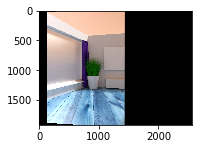

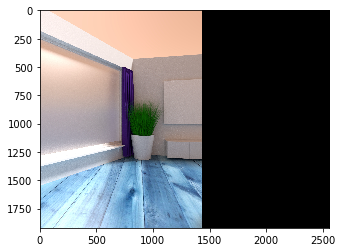

In [10]:
(image12,H1)=stitching(image1,image2);

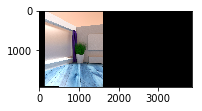

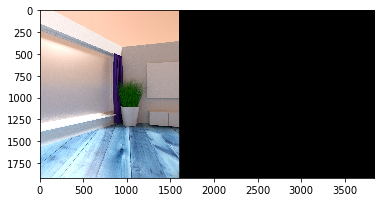

In [11]:
(image123,H2)=stitching(image12,image3);

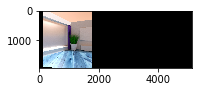

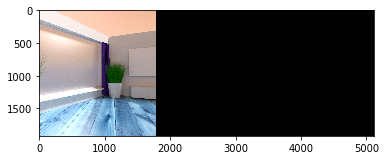

In [12]:
(image1234,H3)=stitching(image123,image4);

***Complete Panorama Image. ***

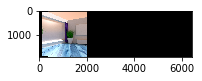

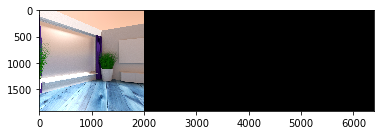

In [13]:
(image12345,H4)=stitching(image1234,image5);

**Storing Images**

In [14]:
cv2.imwrite("Image12.jpg",image12);
cv2.imwrite("Image123.jpg",image123);
cv2.imwrite("Image1234.jpg",image1234);
cv2.imwrite("Image12345.jpg",image12345);

**Printing Homography Matrix.**

In [19]:
print(H1);
print("")
print(H2);
print("")
print(H3);
print("")
print(H4);

[[  9.18956163e-01   6.84082316e-04   1.37537028e+02]
 [ -6.12024653e-02   9.64459110e-01   3.43925634e+01]
 [ -6.39918345e-05   5.73743930e-07   1.00000000e+00]]

[[  9.17148672e-01  -2.52612291e-04   1.39157733e+02]
 [ -6.16688341e-02   9.61727093e-01   3.64051262e+01]
 [ -6.43770987e-05  -3.10409304e-07   1.00000000e+00]]

[[  9.19222006e-01   1.99669861e-04   1.37383199e+02]
 [ -6.06374223e-02   9.63568873e-01   3.49336169e+01]
 [ -6.35320162e-05   1.87522256e-07   1.00000000e+00]]

[[  9.19589368e-01   4.68511109e-04   1.35357318e+02]
 [ -6.06065059e-02   9.63959535e-01   3.49398002e+01]
 [ -6.31489159e-05   3.37376864e-07   1.00000000e+00]]


**Stitching is Done in Right to Left order of Images.**